In [1]:
# We need to think of a better way to compute the forecasted values - the average

In [2]:
# What happense currently?

# We average out the predicted values before transformation, which is not the best thing to do, we need to first do the transformation - and then average things out, let's try computing the metrics this way

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [4]:
# We still need the true counts, so we need the nest few steps, let's leave things as they are

In [5]:
# path to dataframes
path_to_dfs = "suggestion_2/forecasted_counts/block_0302"

In [6]:
# os.listdir(path_to_dfs)

In [7]:
len(os.listdir(path_to_dfs))

6370

In [8]:
6370/910

7.0

In [9]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [10]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [11]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [12]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [13]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [14]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [15]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [16]:
# ordered_csv_files

In [17]:
# averaged_forecasts_csvs list is pointless at this time?

In [18]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 444 ms, sys: 24.6 ms, total: 469 ms
Wall time: 471 ms


In [19]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [20]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.000000,0.000406,0.00000,-0.014003,0.000000e+00,-0.006570,0.0,-0.015622,0.0,-0.004524,...,0.0,-0.003171,0.0,-0.016560,0.0,-0.001557,0.0,-0.001128,0.0,-0.002171
1,0.009946,-0.003737,0.00376,-0.004209,0.000000e+00,0.000860,0.0,-0.007392,0.0,0.000756,...,0.0,0.000038,0.0,-0.005749,0.0,-0.001955,0.0,-0.000066,0.0,0.001649
2,0.000000,-0.009951,0.00000,-0.013025,0.000000e+00,-0.001112,0.0,-0.001699,0.0,0.005250,...,0.0,-0.000749,0.0,-0.007453,0.0,0.002822,0.0,-0.002384,0.0,-0.003483
3,0.000037,0.009409,0.00455,-0.002757,7.131669e-07,-0.001423,0.0,0.018110,0.0,0.000588,...,0.0,0.000644,0.0,-0.002185,0.0,-0.000807,0.0,0.000506,0.0,0.006351
4,0.000000,-0.002583,0.00000,0.000919,0.000000e+00,-0.002117,0.0,0.002515,0.0,0.002888,...,0.0,-0.001638,0.0,-0.000671,0.0,0.003193,0.0,0.000761,0.0,0.005511


In [21]:
combined_df.shape

(7, 1820)

In [22]:
# get the true values
True_values_df = combined_df[['True_value']]

In [23]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.000000,0.00000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.009946,0.00376,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.00000,0.000000e+00,0.0,0.0,0.000000,0.000000,5.447757e-01,0.241312,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000037,0.00455,7.131669e-07,0.0,0.0,0.000001,0.000154,2.405033e-08,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.00000,0.000000e+00,0.0,0.0,0.000658,0.680220,2.456316e-03,0.000000,0.0,...,0.0,0.0,0.147283,0.108888,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
True_values_df.shape

(7, 910)

In [25]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [26]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.009996,0.003767,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,7.242216e-01,0.272918,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000037,0.004561,7.131672e-07,0.000000,0.000000,1.256399e-06,0.000154,2.405033e-08,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000e+00,0.000000,0.000000,6.585136e-04,0.974312,2.459335e-03,0.000000,0.0,...,0.0,0.0,0.158682,0.115037,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.000000e+00,0.000154,0.983625,8.035206e-03,0.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.517342,2.713586e-01,0.000000,0.000000,1.334030e-07,0.242338,3.136316e-02,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [28]:
sum_true_values

0    49.000000
1    49.000005
2    53.999570
3    50.042349
4    43.000009
5    48.000573
6    36.999999
dtype: float64

In [29]:
# # get the forecasted values
# Forecasted_values_df = combined_df[['Forecasted_value']]

In [30]:
# Forecasted_values_df.head()

In [31]:
# exp_forecasted = np.exp(Forecasted_values_df)-1

In [32]:
# exp_forecasted

In [33]:
# set the values to 0 if the forecasted count is negative?

In [34]:
# exp_forecasted[exp_forecasted < 0] = 0

In [35]:
# exp_forecasted.head()

In [36]:
# sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [37]:
# sum_forecasted_values

In [38]:
# now what about the predicted values? we have stored these in terms of npy files, let's see how we can figure out to get the predicted values

In [39]:
all_forecasts_npy_files = []
for file in os.listdir(path_to_dfs):
    if file[:13] == 'all_forecasts':
        all_forecasts_npy_files.append(file)

In [40]:
len(all_forecasts_npy_files)

910

In [41]:
all_forecasts_npy_files[0]

'all_forecasts_sub_273.npy'

In [42]:
sub_273_forecasts = np.load(os.path.join(path_to_dfs, all_forecasts_npy_files[0]))

In [43]:
sub_273_forecasts.shape

(1000, 4, 7)

In [44]:
# Okay, we have the values for the 7 test periods corresponding to the subwindow 273

In [45]:
# we need to first transform the values?

In [46]:
sub_273_forecasts = np.exp(sub_273_forecasts) - 1

In [47]:
sub_273_forecasts.min(), sub_273_forecasts.max()

(-0.46242678, 0.85625625)

In [48]:
# get rid of anything below zero?
sub_273_forecasts[sub_273_forecasts < 0] = 0

In [49]:
# sub_273_forecasts

In [50]:
# We can now take the average?

In [51]:
sub_273_forecasts_averged = np.mean(sub_273_forecasts, axis = (0,1))

In [52]:
sub_273_forecasts_averged.shape

(7,)

In [53]:
sub_273_forecasts_averged

array([0.03196063, 0.05114222, 0.06398609, 0.03537165, 0.03381708,
       0.03250982, 0.03295483], dtype=float32)

In [54]:
0.08*910

72.8

In [55]:
sub_273_forecasts.shape

(1000, 4, 7)

In [56]:
# sanity check
for i in range(sub_273_forecasts.shape[-1]):
    track = sub_273_forecasts[:,:,i]
    print(np.mean(track))

0.03196063
0.051142205
0.063986026
0.035371624
0.033817064
0.03250985
0.032954834


In [57]:
# Okay, this is what we need, but what do we need at the end? we need this to happen to all the 910 subwindows and get the means - collect these in a list first?

In [58]:
# all_forecasts_sub_273

In [59]:
%%time
catch_all_averaged_preds = []
for i in range(910):
    file_name = "all_forecasts_sub_" + str(i) + '.npy'
    al_forecasts_npy_file = np.load(os.path.join(path_to_dfs, file_name))
    # make the conversion
    sub_window_forecasts = np.exp(al_forecasts_npy_file) - 1
    # get rid of anything below zero?
    sub_window_forecasts[sub_window_forecasts < 0] = 0
    # get averages over time 
    sub_window_forecasts_averaged = np.mean(sub_window_forecasts, axis = (0,1))
    catch_all_averaged_preds.append(sub_window_forecasts_averaged)    

CPU times: user 253 ms, sys: 43 ms, total: 296 ms
Wall time: 297 ms


In [60]:
len(catch_all_averaged_preds)

910

In [61]:
catch_all_averaged_preds[0]

array([0.00377256, 0.00139838, 0.00113274, 0.01190272, 0.00117859,
       0.00052243, 0.00277345], dtype=float32)

In [62]:
# make this a dataframe

In [63]:
Forecasted_values_df = pd.DataFrame(catch_all_averaged_preds).T

In [64]:
Forecasted_values_df.shape

(7, 910)

In [65]:
sum_forecasted_values = Forecasted_values_df.sum(axis = 1)

In [66]:
sum_forecasted_values

0    52.155930
1    50.420883
2    51.446159
3    61.063038
4    57.610744
5    57.210243
6    64.521851
dtype: float32

In [67]:
# These results are absurd, let's stick to what we had done before, we can justify that, this is what we did for comps as well

In [68]:
# concatenate the sum dataframes
block_0103_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [69]:
block_0103_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [70]:
block_0103_true_and_forecasted_values_df

,True_count,Forecasted_count
0,49.000000,52.155930
1,49.000005,50.420883
2,53.999570,51.446159
3,50.042349,61.063038
4,43.000009,57.610744
5,48.000573,57.210243
6,36.999999,64.521851


In [71]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

13.069584242578225

In [72]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

9.927594962677478

In [73]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=-0.7189159200855058, pvalue=0.06867638871594726)

In [74]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-5.530453910168776

##### Coverages and widths for the forecasted values?

In [75]:
# for this we need the all_forecasts npy files

In [76]:
# content location is the same path as above

In [77]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [78]:
# all_forecasts_npy_files

In [79]:
# load the npy files

In [80]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.mean(np.exp(load_file)-1, axis = 1)
    loaded_npy_files.append(mean_file)

CPU times: user 236 ms, sys: 73.2 ms, total: 309 ms
Wall time: 310 ms


In [81]:
len(loaded_npy_files)

910

In [82]:
loaded_npy_files[0].shape

(1000, 7)

In [83]:
loaded_npy_files[0]

array([[-0.0005713 , -0.00290911, -0.00832652, ...,  0.0013577 ,
        -0.00154831,  0.002158  ],
       [ 0.00037223, -0.00336991, -0.00891715, ...,  0.00051107,
        -0.00170204,  0.0018969 ],
       [-0.00104801, -0.00317073, -0.00985625, ...,  0.00071396,
        -0.00124769,  0.0015374 ],
       ...,
       [ 0.00245699, -0.00314865, -0.00719281, ...,  0.00023551,
         0.00086762,  0.00282682],
       [ 0.00144865, -0.00429875, -0.00611651, ...,  0.0016598 ,
         0.00176926,  0.00339009],
       [ 0.0028083 , -0.00326796, -0.00719012, ...,  0.00219503,
         0.0021771 ,  0.00364222]], dtype=float32)

In [84]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 24.6 ms, sys: 0 ns, total: 24.6 ms
Wall time: 24.3 ms


In [85]:
loaded_npy_files[0]

array([[0.        , 0.        , 0.        , ..., 0.0013577 , 0.        ,
        0.002158  ],
       [0.00037223, 0.        , 0.        , ..., 0.00051107, 0.        ,
        0.0018969 ],
       [0.        , 0.        , 0.        , ..., 0.00071396, 0.        ,
        0.0015374 ],
       ...,
       [0.00245699, 0.        , 0.        , ..., 0.00023551, 0.00086762,
        0.00282682],
       [0.00144865, 0.        , 0.        , ..., 0.0016598 , 0.00176926,
        0.00339009],
       [0.0028083 , 0.        , 0.        , ..., 0.00219503, 0.0021771 ,
        0.00364222]], dtype=float32)

In [86]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [87]:
output.shape

(1000, 7)

In [88]:
output

array([[47.483   , 45.41474 , 51.73859 , ..., 53.008503, 55.258984,
        60.55997 ],
       [40.30781 , 38.99667 , 42.7499  , ..., 40.12346 , 48.08682 ,
        50.928078],
       [46.440186, 44.84306 , 50.14463 , ..., 56.781624, 58.32132 ,
        60.248882],
       ...,
       [42.18449 , 43.108204, 44.50878 , ..., 46.496136, 49.509285,
        57.879322],
       [37.73871 , 39.470425, 49.66995 , ..., 52.62048 , 48.790405,
        60.11103 ],
       [43.887337, 45.028286, 47.882183, ..., 53.874416, 52.66582 ,
        58.20393 ]], dtype=float32)

In [89]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [90]:
output_alt.shape

(1000, 7)

In [91]:
output_alt

array([[47.483   , 45.41474 , 51.73859 , ..., 53.008503, 55.258984,
        60.55997 ],
       [40.30781 , 38.99667 , 42.7499  , ..., 40.12346 , 48.08682 ,
        50.928078],
       [46.440186, 44.84306 , 50.14463 , ..., 56.781624, 58.32132 ,
        60.248882],
       ...,
       [42.18449 , 43.108204, 44.50878 , ..., 46.496136, 49.509285,
        57.879322],
       [37.73871 , 39.470425, 49.66995 , ..., 52.62048 , 48.790405,
        60.11103 ],
       [43.887337, 45.028286, 47.882183, ..., 53.874416, 52.66582 ,
        58.20393 ]], dtype=float32)

In [92]:
np.mean(output_alt == output)

1.0

In [93]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [94]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [95]:
li_train

array([[32.55439358],
       [32.12753057],
       [31.89365344],
       [34.49145975],
       [31.6133718 ],
       [33.38514938],
       [35.13804951]])

In [96]:
ui_train

array([[53.36515274],
       [52.65787401],
       [55.78643265],
       [74.64338436],
       [74.59893017],
       [63.47301311],
       [84.26841774]])

In [97]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [98]:
avg_width_train

32.51279953547886

In [99]:
y_traina = block_0103_true_and_forecasted_values_df[["True_count"]].values

In [100]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [101]:
coverage_train

1.0

In [102]:
y_traina

array([[49.00000008],
       [49.00000505],
       [53.99956993],
       [50.04234922],
       [43.00000909],
       [48.00057269],
       [36.99999861]])

In [103]:
np.mean(output, axis = 0)

array([41.988   , 41.236423, 42.952427, 49.909386, 46.435024, 46.790775,
       53.12808 ], dtype=float32)

In [104]:
sum_forecasted_values

0    52.155930
1    50.420883
2    51.446159
3    61.063038
4    57.610744
5    57.210243
6    64.521851
dtype: float32

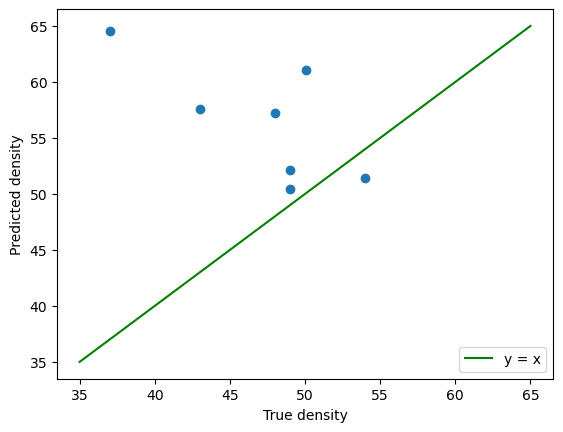

In [108]:
plt.scatter(block_0103_true_and_forecasted_values_df['True_count'], block_0103_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([35, 65], [35, 65], color='green', label='y = x')
plt.legend()
plt.show()

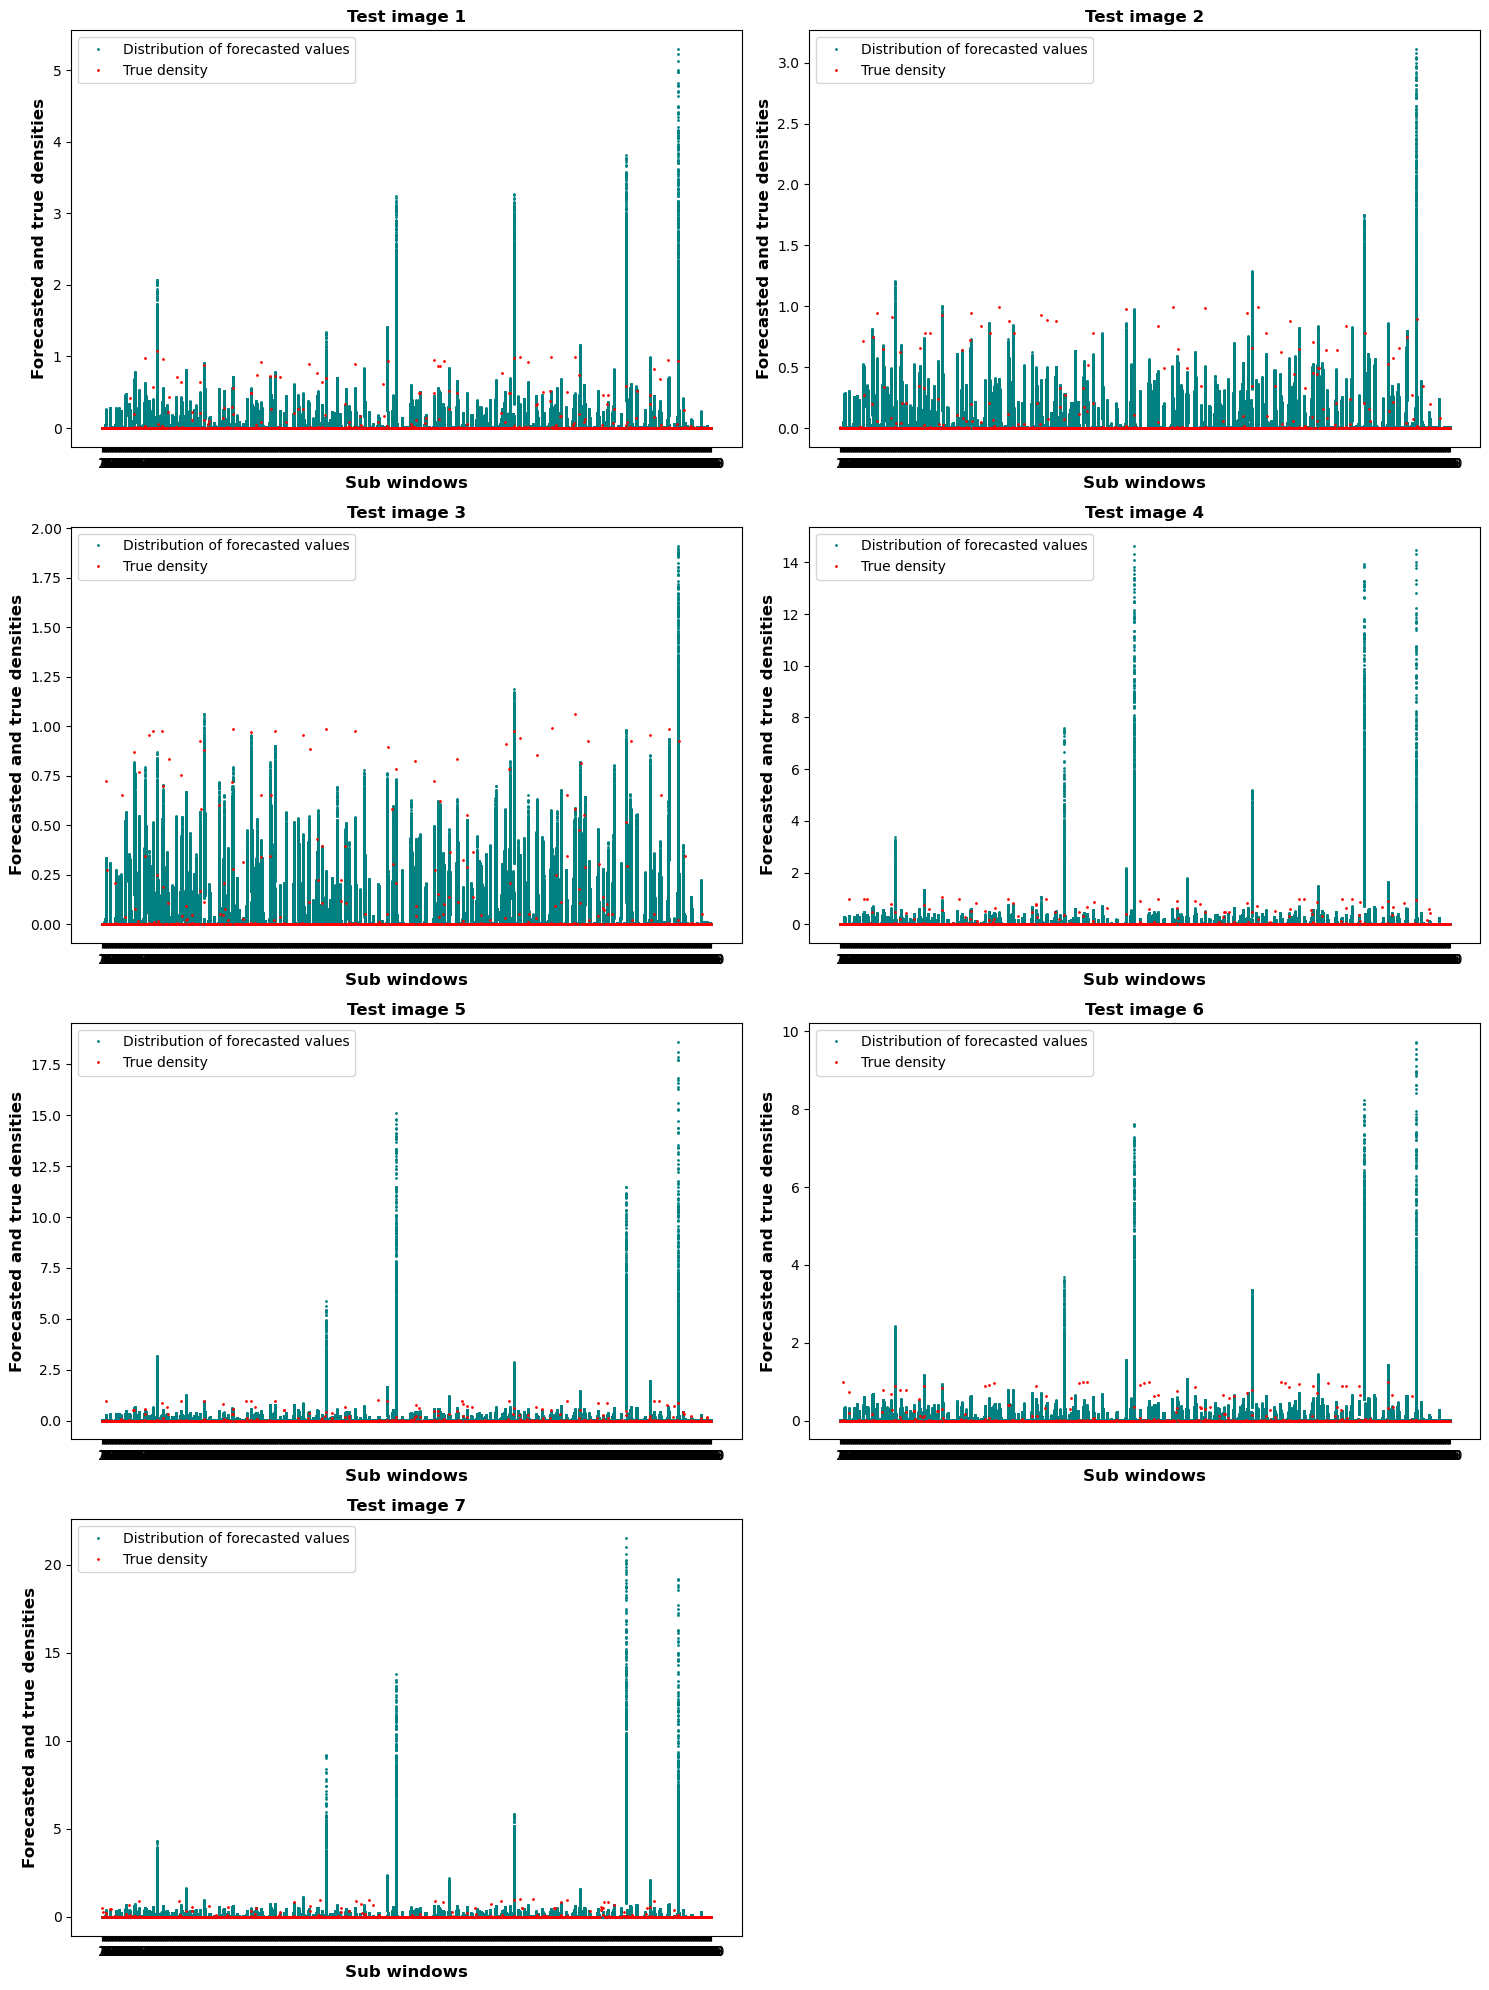

CPU times: user 27 s, sys: 860 ms, total: 27.8 s
Wall time: 27.4 s


In [106]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [107]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots